<a href="https://colab.research.google.com/github/udaysharma1501/association_mining_practicenb/blob/main/Association_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Association Mining using Apriori Algorithm**
---
### **1. Association Mining on Groceries Dataset**
---
### **1.1 Library installation**
---

In [1]:
install.packages('arules')
install.packages('arulesViz')
install.packages('RColorBrewer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---
### **1.2 Library inclusion**
---

In [2]:
library(arules)
library(arulesViz)
library(RColorBrewer)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




---
### **1.3 Import Groceries dataset and perform basics analytics**
---

In [3]:
data("Groceries")

In [4]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [5]:
?Groceries

In [6]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [7]:
head(Groceries)

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)

In [8]:
inspect(head(Groceries))

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [9]:
Groceries@itemInfo$labels[1:20]

[1] "frankfurter"       "sausage"           "liver loaf"       
 [4] "ham"               "meat"              "finished products"
 [7] "organic sausage"   "chicken"           "turkey"           
[10] "pork"              "beef"              "hamburger meat"   
[13] "fish"              "citrus fruit"      "tropical fruit"   
[16] "pip fruit"         "grapes"            "berries"          
[19] "nuts/prunes"       "root vegetables"

In [10]:
which(Groceries@itemInfo$labels == 'butter')

[1] 26

---
### **1.4 Applying Apriori Algorithm**
---

In [11]:
rules <- apriori(data = Groceries, parameter =  list(supp = 0.01, conf = 0.2, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [232 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


---
### **1.5 Summarize the rules**
---

In [12]:
summary(rules)

set of 232 rules

rule length distribution (lhs + rhs):sizes
  1   2   3 
  1 151  80 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.341   3.000   3.000 

summary of quality measures:
    support          confidence        coverage            lift       
 Min.   :0.01007   Min.   :0.2006   Min.   :0.01729   Min.   :0.8991  
 1st Qu.:0.01200   1st Qu.:0.2470   1st Qu.:0.03437   1st Qu.:1.4432  
 Median :0.01490   Median :0.3170   Median :0.05241   Median :1.7277  
 Mean   :0.02005   Mean   :0.3321   Mean   :0.06708   Mean   :1.7890  
 3rd Qu.:0.02227   3rd Qu.:0.4033   3rd Qu.:0.07565   3rd Qu.:2.0762  
 Max.   :0.25552   Max.   :0.5862   Max.   :1.00000   Max.   :3.2950  
     count       
 Min.   :  99.0  
 1st Qu.: 118.0  
 Median : 146.5  
 Mean   : 197.2  
 3rd Qu.: 219.0  
 Max.   :2513.0  

mining info:
      data ntransactions support confidence
 Groceries          9835    0.01        0.2
                                                           

---
### **1.6 Inspect the rules**
---

In [13]:
inspect(rules)

      lhs                           rhs                     support confidence   coverage      lift count
[1]   {}                         => {whole milk}         0.25551601  0.2555160 1.00000000 1.0000000  2513
[2]   {hard cheese}              => {whole milk}         0.01006609  0.4107884 0.02450432 1.6076815    99
[3]   {butter milk}              => {other vegetables}   0.01037112  0.3709091 0.02796136 1.9169159   102
[4]   {butter milk}              => {whole milk}         0.01159126  0.4145455 0.02796136 1.6223854   114
[5]   {ham}                      => {whole milk}         0.01148958  0.4414062 0.02602949 1.7275091   113
[6]   {sliced cheese}            => {whole milk}         0.01077783  0.4398340 0.02450432 1.7213560   106
[7]   {oil}                      => {whole milk}         0.01128622  0.4021739 0.02806304 1.5739675   111
[8]   {onions}                   => {other vegetables}   0.01423488  0.4590164 0.03101169 2.3722681   140
[9]   {onions}                   => {whole mil

---
### **1.7 Visualize rules**
---

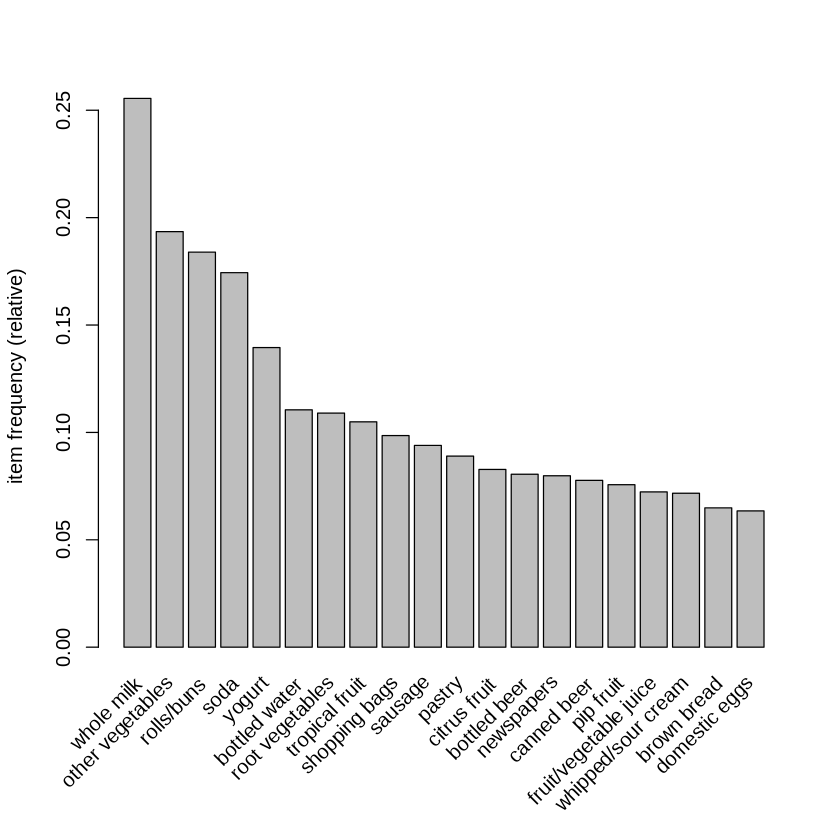

In [14]:
arules::itemFrequencyPlot(Groceries, topN=20)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



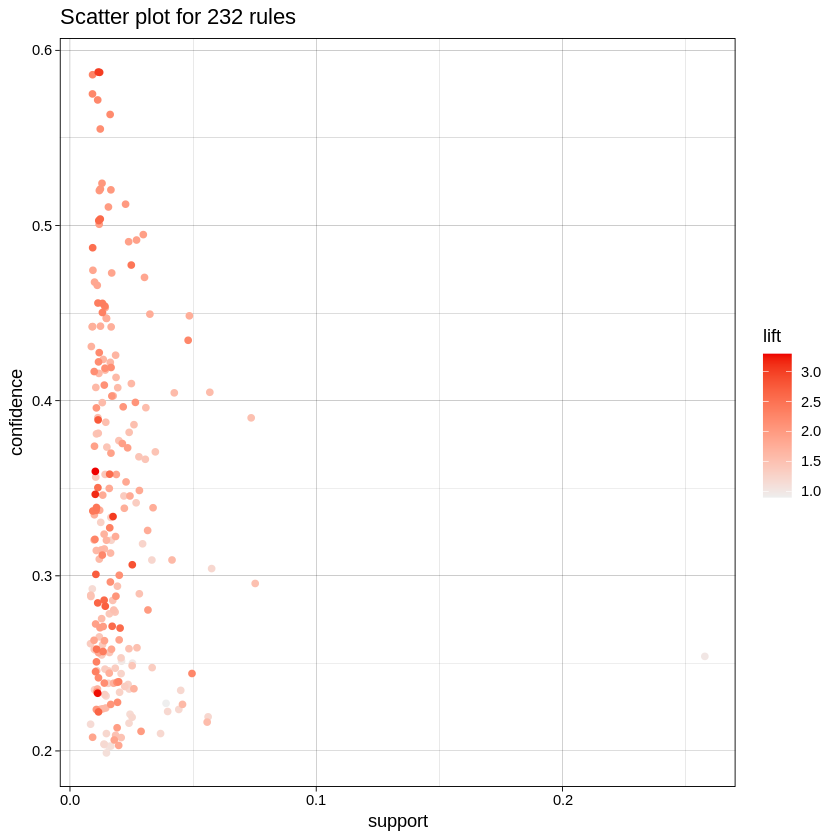

In [17]:
# plot(rules, jitter=0)
plot(rules)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



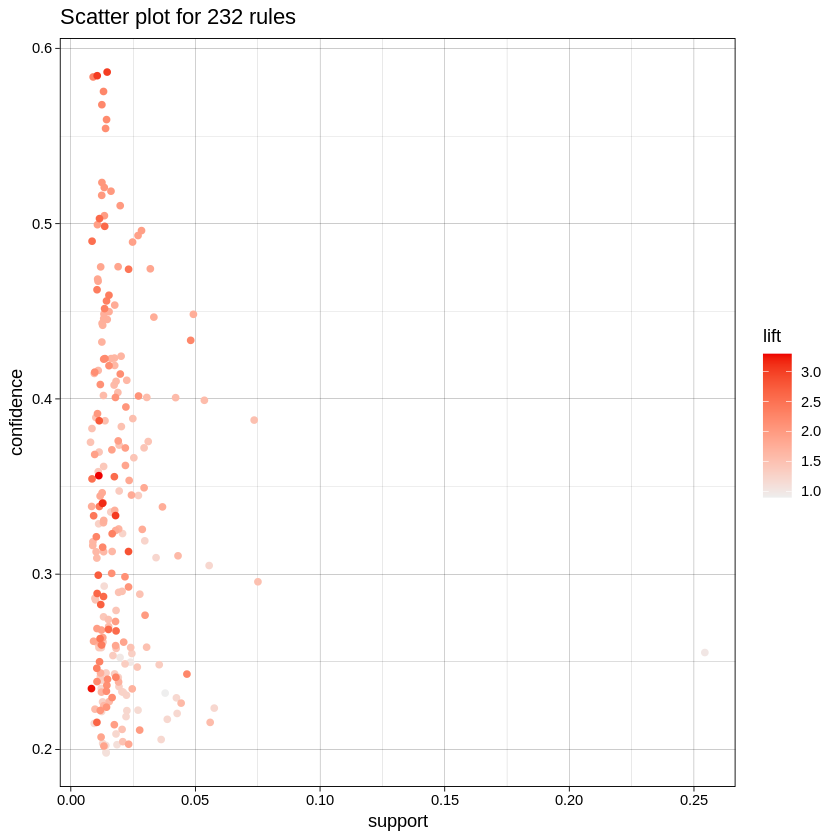

In [18]:
plot(rules, method = "scatterplot")

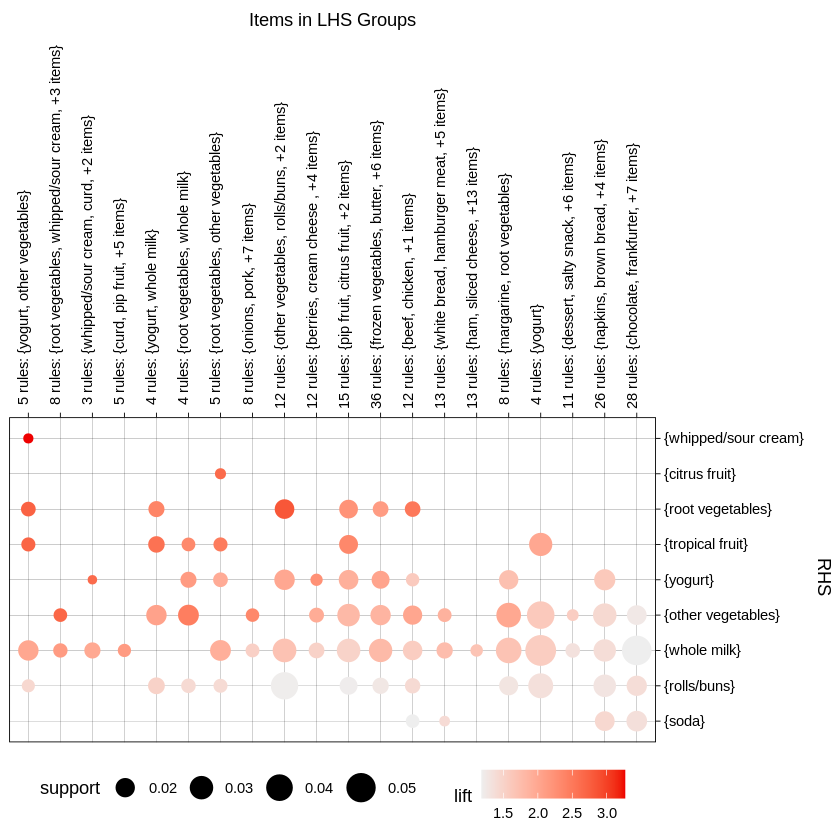

In [19]:
plot(rules, method = "grouped")

Warning message:
“Too many rules supplied. Only plotting the best 100 using ‘lift’ (change control parameter max if needed).”


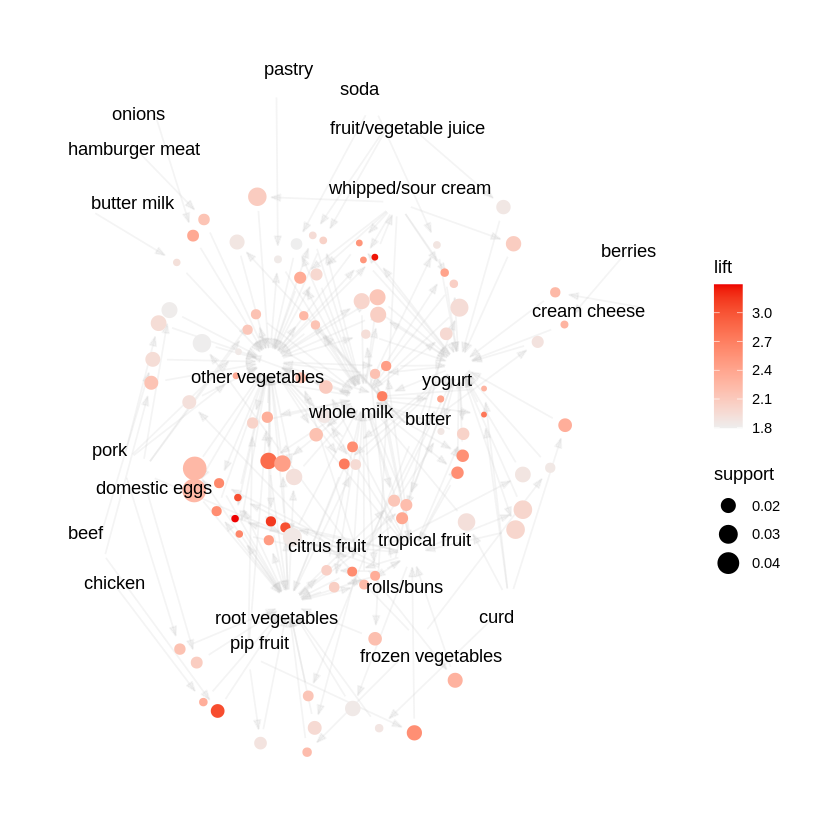

In [20]:
plot(rules,method = "graph")

---
### **1.8 Export rules to csv file**
---

In [21]:
write.table(as(rules, "data.frame"), "rules-Groceries.csv", sep = ",", col.names = T, append = F,row.names = F)

---
## **2. Association Mining for Adult Dataset**
---


Try yourself. Import the Adult dataset using data(Adult)